In [1]:
import torch
import torch.nn as nn
import numpy as np
import os
from star.pytorch.star import STAR
import pickle
import csv
import json

In [ ]:
with open('foot_f.obj', 'rb') as file:
    foot_f = pickle.load(file)
    
num_betas = 300
batch_size=1

with open ('idx_data.txt', 'rb') as fr:
    idx_data = pickle.load(fr)
    
print(idx_data)

length_start_idx = idx_data['length_start']
length_end_idx = idx_data['length_end']
width_start_idx = idx_data['width_start']
width_end_idx = idx_data['width_end']
height_start_idx = idx_data['height_start']
height_end_idx = idx_data['height_end']

sample_data = []

In [3]:
#length : z 
#width: x
#height: y
features = open('./samples/female_samples_feature.csv', 'w', newline='')
wr = csv.writer(features)
wr.writerow(['sample#', 'length', 'width', 'height', 'gender'])

total = open('./samples/total_samples_feature.csv','w', newline='')
wr_t = csv.writer(total)
wr_t.writerow(['sample#', 'length', 'width', 'height', 'gender'])
x = 0

for i in range (1000): 
    gender = 'female'
    filename='./samples/female/sample_f{}.obj'.format(i)
    
    poses = torch.FloatTensor(np.zeros((batch_size,72)))
    betas = torch.FloatTensor(np.random.normal(loc=0, scale=1, size=(batch_size,num_betas)))
    trans = torch.FloatTensor(np.zeros((batch_size,3)))
    mystar = STAR(gender=gender,num_betas=num_betas)
    mymodel = mystar.forward(poses , betas , trans)
    shaped = mymodel.v_shaped[-1, :, :]
    
    x_diff = shaped[3387][0]
    y_diff = shaped[3387][1]
    z_diff = shaped[3387][2]
    
    length = (shaped[length_end_idx-1][2]-shaped[length_start_idx-1][2]).item()
    width = (shaped[width_end_idx-1][0]-shaped[width_start_idx-1][0]).item()
    height = (shaped[height_end_idx-1][1]-shaped[height_start_idx-1][1]).item()
    
    new_shaped=[]

    thefile = open(filename, 'w')
    for item in shaped:
      x_vertex = (item[0]-x_diff).item()
      y_vertex = (item[1]-y_diff).item()
      z_vertex = (item[2]-z_diff).item()
      thefile.write("v {0} {1} {2}\n".format(x_vertex, y_vertex, z_vertex))
    
      vertex = [x_vertex, y_vertex, z_vertex]
      new_shaped.append(vertex)

    for item in foot_f:
      thefile.write("f {0}// {1}// {2}//\n".format(item[0][0],item[1][0],item[2][0]))  

    thefile.close()
    
    wr.writerow([i,
                 (shaped[length_end_idx-1][2]-shaped[length_start_idx-1][2]).item(),
                 (shaped[width_end_idx-1][0]-shaped[width_start_idx-1][0]).item(),
                 (shaped[height_end_idx-1][1]-shaped[height_start_idx-1][1]).item(),
                 gender])
    wr_t.writerow([x,
                 (shaped[length_end_idx-1][2]-shaped[length_start_idx-1][2]).item(),
                 (shaped[width_end_idx-1][0]-shaped[width_start_idx-1][0]).item(),
                 (shaped[height_end_idx-1][1]-shaped[height_start_idx-1][1]).item(),
                 gender])
    x+=1
    sample_data.append({
        "gender" : gender,
        'feature':{
            'length' : length,
            'width' : width, 
            'height' : height
        },
        'shape': betas.tolist(),
        'vertex' : new_shaped,
        
    })
features.close()
    

In [4]:
features = open('./samples/male_samples_feature.csv', 'w', newline='')
wr = csv.writer(features)
wr.writerow(['sample#', 'length', 'width', 'height', 'gender'])

for i in range (1000): 
    gender = 'male'
    filename='./samples/male/sample_f{}.obj'.format(i)
    
    poses = torch.FloatTensor(np.zeros((batch_size,72)))
    betas = torch.FloatTensor(np.random.normal(loc=0, scale=1, size=(batch_size,num_betas)))
    trans = torch.FloatTensor(np.zeros((batch_size,3)))
    mystar = STAR(gender=gender,num_betas=num_betas)
    mymodel = mystar.forward(poses , betas , trans)
    shaped = mymodel.v_shaped[-1, :, :]
    
    x_diff = shaped[3387][0]
    y_diff = shaped[3387][1]
    z_diff = shaped[3387][2]
    
    length = (shaped[length_end_idx-1][2]-shaped[length_start_idx-1][2]).item()
    width = (shaped[width_end_idx-1][0]-shaped[width_start_idx-1][0]).item()
    height = (shaped[height_end_idx-1][1]-shaped[height_start_idx-1][1]).item()
    
    new_shaped=[]

    thefile = open(filename, 'w')
    for item in shaped:
      x_vertex = (item[0]-x_diff).item()
      y_vertex = (item[1]-y_diff).item()
      z_vertex = (item[2]-z_diff).item()
      thefile.write("v {0} {1} {2}\n".format(x_vertex, y_vertex, z_vertex))
    
      vertex = [x_vertex, y_vertex, z_vertex]
      new_shaped.append(vertex)

    for item in foot_f:
      thefile.write("f {0}// {1}// {2}//\n".format(item[0][0],item[1][0],item[2][0]))  

    thefile.close()
    
    wr.writerow([i,
                 (shaped[length_end_idx-1][2]-shaped[length_start_idx-1][2]).item(),
                 (shaped[width_end_idx-1][0]-shaped[width_start_idx-1][0]).item(),
                 (shaped[height_end_idx-1][1]-shaped[height_start_idx-1][1]).item(),
                 gender])
    wr_t.writerow([x,
                 (shaped[length_end_idx-1][2]-shaped[length_start_idx-1][2]).item(),
                 (shaped[width_end_idx-1][0]-shaped[width_start_idx-1][0]).item(),
                 (shaped[height_end_idx-1][1]-shaped[height_start_idx-1][1]).item(),
                 gender])
    x+=1
    sample_data.append({
        "gender" : gender,
        'feature':{
            'length' : length,
            'width' : width, 
            'height' : height
        },
        'shape': betas.tolist(),
        'vertex' : new_shaped,
        
    })
features.close()
total.close()
    

features = open('./samples/male_samples_feature.csv', 'w', newline='')
wr = csv.writer(features)
wr.writerow(['sample#', 'length', 'width', 'height', 'gender'])

for i in range (20): 
    gender = 'male'
    filename='./samples/male/sample_f{}.obj'.format(i)
    
    poses = torch.FloatTensor(np.zeros((batch_size,72)))
    betas = torch.FloatTensor(np.random.normal(loc=0, scale=1, size=(batch_size,num_betas)))
    trans = torch.FloatTensor(np.zeros((batch_size,3)))
    mystar = STAR(gender=gender,num_betas=num_betas)
    mymodel = mystar.forward(poses , betas , trans)
    shaped = mymodel.v_shaped[-1, :, :]
    
    x_diff = shaped[3387][0]
    y_diff = shaped[3387][1]
    z_diff = shaped[3387][2]

    thefile = open(filename, 'w')
    for item in shaped:
      thefile.write("v {0} {1} {2}\n".format(item[0]-x_diff,item[1]-y_diff,item[2]-z_diff))

    for item in foot_f:
      thefile.write("f {0}// {1}// {2}//\n".format(item[0][0],item[1][0],item[2][0]))  

    thefile.close()
    
    wr.writerow([i,
                 (shaped[length_end_idx-1][2]-shaped[length_start_idx-1][2]).item(),
                 (shaped[width_end_idx-1][0]-shaped[width_start_idx-1][0]).item(),
                 (shaped[height_end_idx-1][1]-shaped[height_start_idx-1][1]).item(),
                 gender])
    wr_t.writerow([x,
                 (shaped[length_end_idx-1][2]-shaped[length_start_idx-1][2]).item(),
                 (shaped[width_end_idx-1][0]-shaped[width_start_idx-1][0]).item(),
                 (shaped[height_end_idx-1][1]-shaped[height_start_idx-1][1]).item(),
                 gender])
    x+=1
    
features.close()


In [5]:
with open("./samples/sample_data.json","w")as json_file:
    json.dump(sample_data,json_file)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

feature_f = pd.read_csv("./samples/female_samples_feature.csv")

feature_m= pd.read_csv("./samples/male_samples_feature.csv")

feature_t = pd.read_csv("./samples/total_samples_feature.csv")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='length', ylabel='width'>

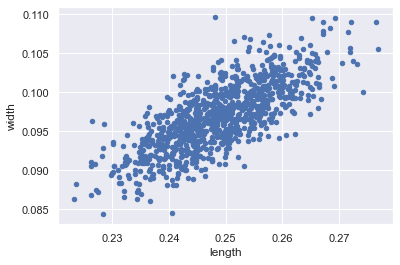

In [7]:
feature_f.plot(kind="scatter", x="length", y="width")

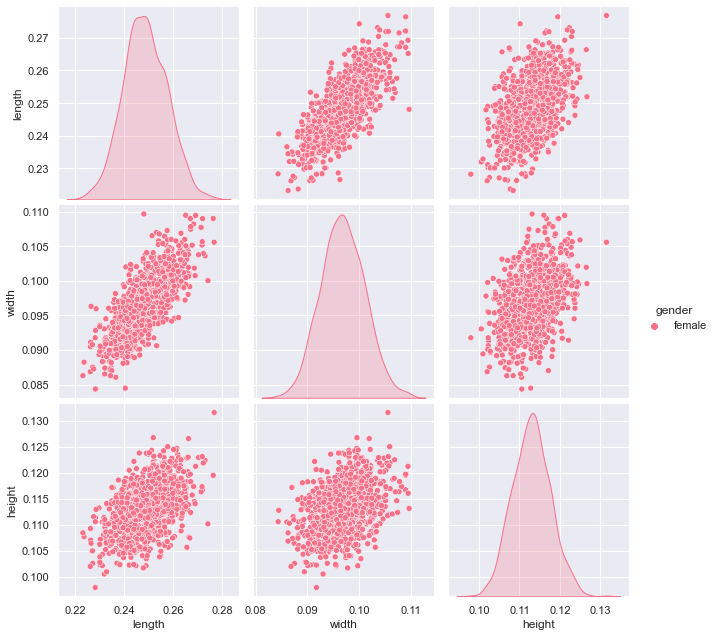

In [8]:
sns.pairplot(feature_f.drop("sample#", axis=1), hue="gender", palette="husl", size=3)

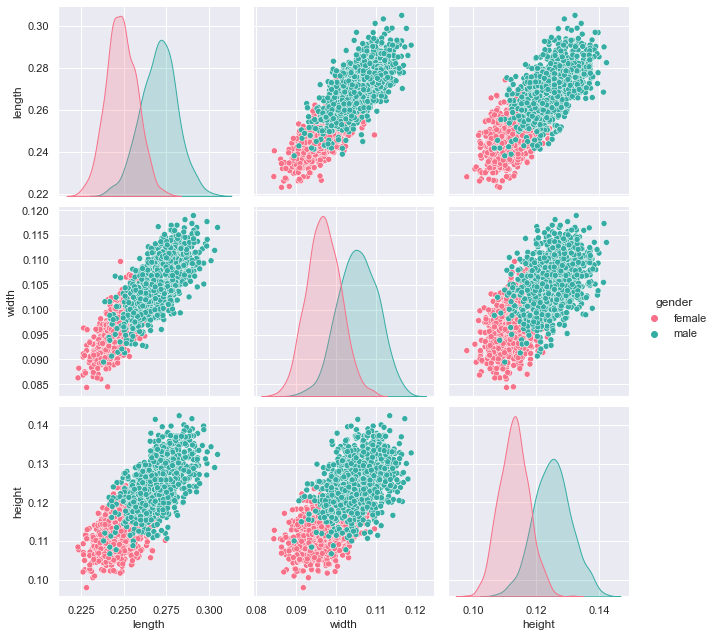

In [9]:
sns.pairplot(feature_t.drop("sample#", axis=1), hue="gender", palette="husl", size=3)